In [1]:
# Импорт библиотек
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Укажите путь к папке с файлами CICIDS 2017
folder_path = r'C:\Users\Гребенников Матвей\Desktop\Диплом\Курсовая\MachineLearningCSV\MachineLearningCVE'  # Замените на реальный путь

# Получение списка всех CSV файлов
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Создание пустого DataFrame для объединения
data = pd.DataFrame()

# Объединение всех файлов
for file in files:
    file_path = os.path.join(folder_path, file)
    temp_data = pd.read_csv(file_path)
    data = pd.concat([data, temp_data], ignore_index=True)

# Проверка результата
print(f"Объединенные данные содержат {data.shape[0]} строк и {data.shape[1]} столбцов.")
data.head()

df = pd.read_csv(file_path)

# Просмотр первых строк данных
df.head()


Объединенные данные содержат 2830743 строк и 79 столбцов.


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80,38308,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,389,479,11,5,172,326,79,0,15.636364,31.449238,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1095,10,6,3150,3150,1575,0,315.000000,632.561635,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,389,15206,17,12,3452,6660,1313,0,203.058823,425.778474,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,1092,9,6,3150,3152,1575,0,350.000000,694.509719,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [3]:
# Проверка на пропущенные значения
# Проверка уникальных значений целевой переменной
print(data[' Label'].value_counts())

# Преобразование меток классов в числовые значения
# Например, BENIGN -> 0, Malicious -> 1
data[' Label'] = data[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

# Разделение данных на X и y
X = data.drop(' Label', axis=1)  # Признаки
y = data[' Label']              # Целевая переменная

X = pd.get_dummies(X, drop_first=True)


 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [4]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=132)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (2264594, 78)
Размер тестовой выборки: (566149, 78)


In [5]:
#проверка на доминирование
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


 Label
0    0.802961
1    0.197039
Name: proportion, dtype: float64
 Label
0    0.803174
1    0.196826
Name: proportion, dtype: float64


In [6]:
# Проверка на наличие NaN или inf в данных
print(f"Есть ли пропущенные значения в X_train? {np.any(np.isnan(X_train))}")
print(f"Есть ли бесконечные значения в X_train? {np.any(np.isinf(X_train))}")

# Если есть, показать количество таких значений
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("Количество NaN в X_train:", np.sum(np.isnan(X_train)))
    print("Количество inf в X_train:", np.sum(np.isinf(X_train)))
    
# Замена NaN значений на 0 или другой подходящий показатель
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(0)

# Тестовая выборка
X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(0)


Есть ли пропущенные значения в X_train? True
Есть ли бесконечные значения в X_train? True


C:\Users\Гребенников Матвей\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Количество NaN в X_train:  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64
Количество inf в X_train:  Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
 Active Min                    0
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
Length: 78, dtype: int64


C:\Users\Гребенников Матвей\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [7]:
#Нормализация болих значений данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# Создание и обучение модели дерева решений
clf = DecisionTreeClassifier(class_weight="balanced", random_state=42)
clf.fit(X_train, y_train)

# Вывод глубины дерева и числа листьев
print(f"Глубина дерева: {clf.get_depth()}")
print(f"Количество листьев: {clf.get_n_leaves()}")


Глубина дерева: 43
Количество листьев: 3415


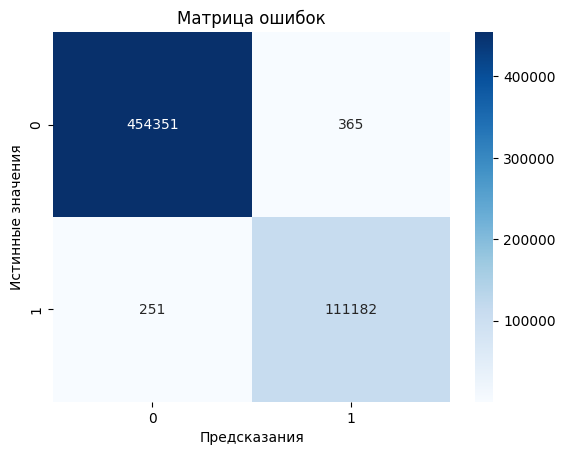

Отчет классификации:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454716
           1       1.00      1.00      1.00    111433

    accuracy                           1.00    566149
   macro avg       1.00      1.00      1.00    566149
weighted avg       1.00      1.00      1.00    566149

Точность модели: 1.00


In [9]:
# Предсказания на тестовой выборке
y_pred = clf.predict(X_test)

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Матрица ошибок")
plt.xlabel("Предсказания")
plt.ylabel("Истинные значения")
plt.show()

# Метрики
print("Отчет классификации:")
print(classification_report(y_test, y_pred))

# Точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")


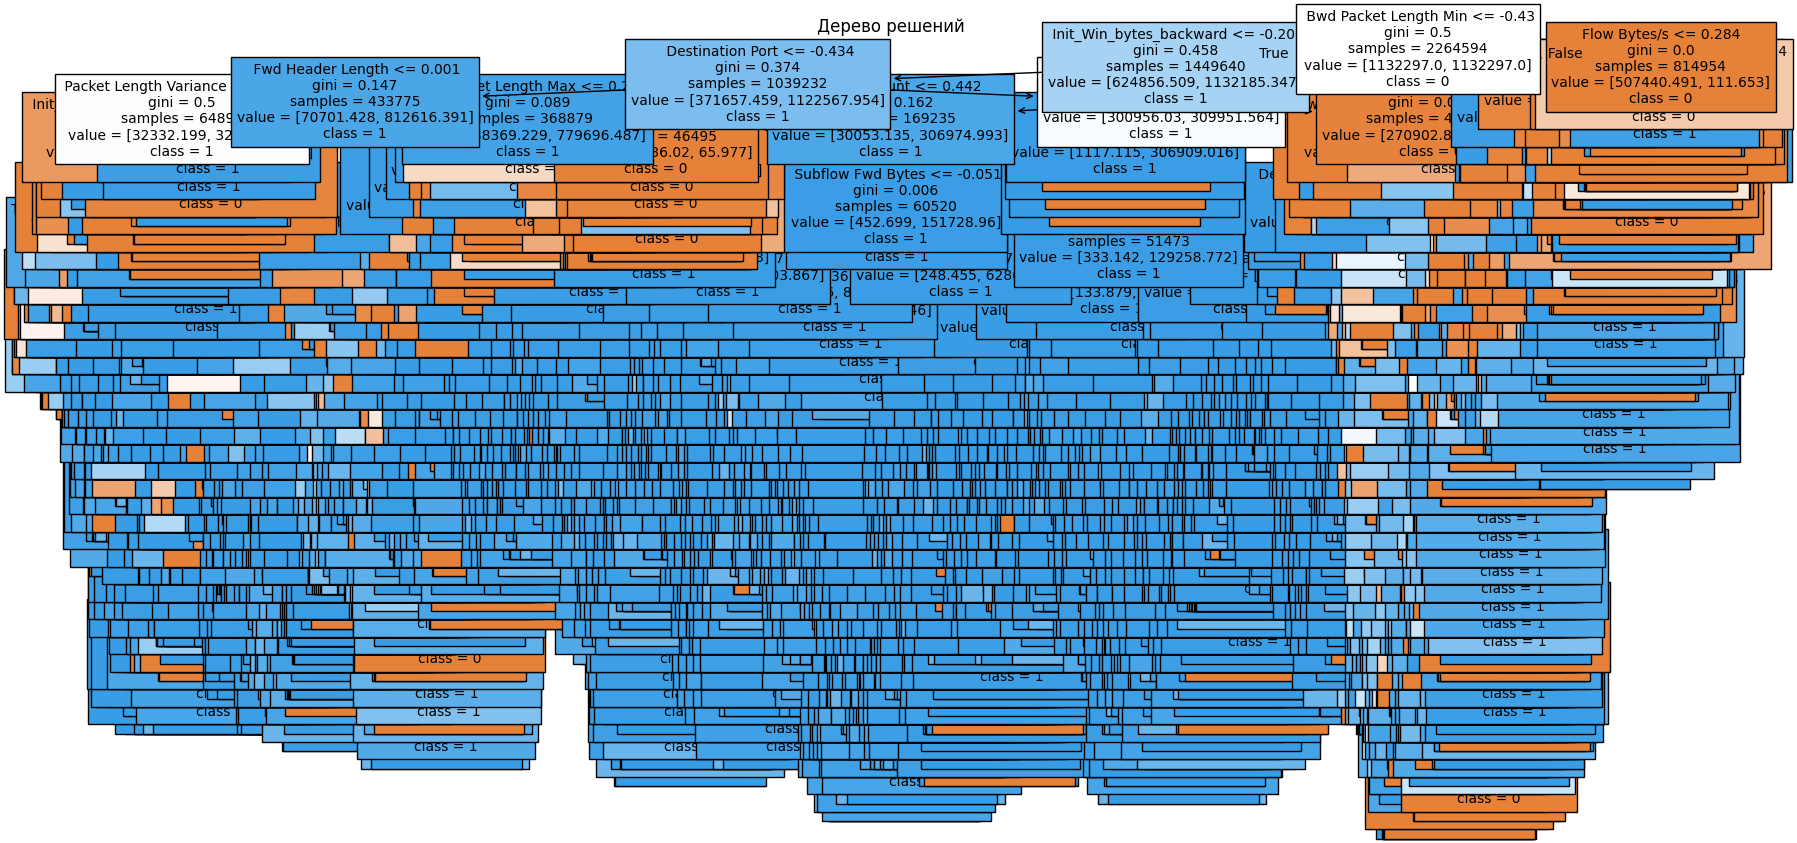

In [10]:
# Визуализация дерева решений
class_names = [str(cls) for cls in clf.classes_]

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=class_names, filled=True, fontsize=10)
plt.title("Дерево решений")
plt.show()


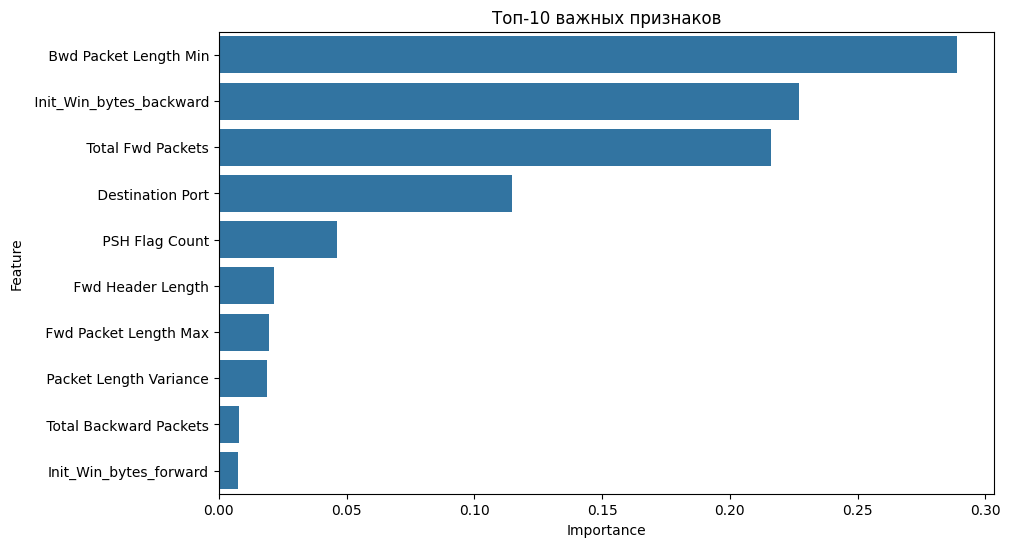

In [11]:
# Важность признаков
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature')
plt.title("Топ-10 важных признаков")
plt.show()
